*REGRESIÓN LINEAL SIMPLE*

In [1]:
#Importamos nuestras librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   
#Procesado y Modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels as sms
from statsmodels.stats.diagnostic import het_breuschpagan
# configuración de matplotlib
plt.rcParams['image.cmap']="bwr"
plt.rcParams['figure.dpi']="200"
plt.rcParams['savefig.bbox']="tight"
plt.style.use(r"C:\Users\gilda\Desktop\Python\Proyecto Futbol\notebooks\neon_dark")

# configuración de warnings
import warnings
warnings.filterwarnings('ignore')

# Recolección Y Limpieza de datos

Recolectaremos nuestros datos de la página de *FBREF*, donde se almacenan datos futbolísticos de interés

In [2]:
# Se define la url de interés
URL = 'https://fbref.com/en/squads/c02b0f7a/2023-2024/Guadalajara-Stats'

df_Scores = pd.read_html(URL)[1]
df_Scores = df_Scores.drop(columns='Match Report')
print(df_Scores.columns)
df_Scores.head()

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Notes'],
      dtype='object')


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Notes
0,2023-07-03,21:00,Liga MX,Apertura 2023 Regular Season,Mon,Away,W,2,1,León,30,24120,Víctor Guzmán,4-3-3,3-4-3,Oscar Mejia,NaN
1,2023-07-08,19:05,Liga MX,Apertura 2023 Regular Season,Sat,Home,W,3,1,Atlético,54,34711,Víctor Guzmán,5-4-1,4-2-3-1,Víctor Cáceres,NaN
2,2023-07-13,22:00,Liga MX,Apertura 2023 Regular Season,Thu,Home,W,2,0,Necaxa,56,34418,Víctor Guzmán,4-1-4-1,5-4-1,Jesus Lopez,NaN
3,2023-08-18,21:10,Liga MX,Apertura 2023 Regular Season,Fri,Away,D,1,1,FC Juárez,41,14976,Jesús Sánchez García,4-3-3,4-2-3-1,Fernando Hernández,NaN
4,2023-08-22,20:00,Liga MX,Apertura 2023 Regular Season,Tue,Home,W,1,0,Tijuana,59,27547,Víctor Guzmán,4-2-3-1,4-4-2,Adonai Escobedo,NaN


In [3]:
df_Stats = pd.read_html(URL)[0]
df_Stats.columns = df_Stats.columns.droplevel(0)
df_Stats = df_Stats.drop(columns='Matches')
# Quitar las últimas columnas
df_Stats = df_Stats.iloc[:, :-5]

print(df_Stats.columns)
df_Stats.head()

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR'],
      dtype='object')


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,Fernando Beltrán,mx MEX,MF,25.0,34,33,2807.0,31.2,4.0,1.0,5.0,4.0,0.0,0.0,3.0,0.0
1,Roberto Alvarado,mx MEX,"FW,MF",24.0,30,30,2643.0,29.4,11.0,6.0,17.0,6.0,5.0,5.0,7.0,0.0
2,Alan Mozo,mx MEX,DF,26.0,31,29,2663.0,29.6,0.0,2.0,2.0,0.0,0.0,0.0,6.0,0.0
3,Jesús Orozco,mx MEX,DF,21.0,28,28,2436.0,27.1,0.0,1.0,1.0,0.0,0.0,0.0,9.0,0.0
4,Ricardo Marín,mx MEX,FW,25.0,30,25,2037.0,22.6,6.0,1.0,7.0,6.0,0.0,0.0,4.0,1.0


In [4]:
df_GK = pd.read_html(URL)[2]
df_GK.columns = df_GK.columns.droplevel(0)
df_GK = df_GK.drop(df_GK.tail(2).index)
df_GK = df_GK.drop(columns='Matches')
print(df_GK.columns)
df_GK.head()

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'GA',
       'GA90', 'SoTA', 'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%', 'PKatt',
       'PKA', 'PKsv', 'PKm', 'Save%'],
      dtype='object')


,Player,Nation,Pos,Age,MP,Starts,Min,90s,GA,GA90,...,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%
0,José Rangel Aguilar,mx MEX,GK,23.0,19,19,1635,18.2,18,0.99,...,10,5,4,5,26.3,4,3,0,1,0.0
1,Miguel Jiménez Ponce,mx MEX,GK,33.0,16,15,1425,15.8,21,1.33,...,7,2,6,5,33.3,5,4,1,0,20.0


In [5]:
df_Shots = pd.read_html(URL)[3]
df_Shots.columns = df_Shots.columns.droplevel(0)
df_Shots = df_Shots.drop(df_Shots.tail(2).index)
df_Shots = df_Shots.drop(columns='Matches')
df_Shots.head()

,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,PK,PKatt
0,Fernando Beltrán,mx MEX,MF,25.0,31.2,4,36,13,36.1,1.15,0.42,0.11,0.31,NaN,0,0
1,Roberto Alvarado,mx MEX,"FW,MF",24.0,29.4,11,65,27,41.5,2.21,0.92,0.09,0.22,NaN,5,5
2,Alan Mozo,mx MEX,DF,26.0,29.6,0,20,1,5.0,0.68,0.03,0.00,0.00,NaN,0,0
3,Jesús Orozco,mx MEX,DF,21.0,27.1,0,12,0,0.0,0.44,0.00,0.00,NaN,NaN,0,0
4,Ricardo Marín,mx MEX,FW,25.0,22.6,6,48,16,33.3,2.12,0.71,0.13,0.38,NaN,0,0


# Descripción de los Datos

In [6]:
df_Stats_numeric = df_Stats.select_dtypes(include=[np.number])
df_Stats_numeric.corr()

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
Age,1.000000,0.175842,0.112102,0.116768,0.116226,0.076345,0.092250,0.082617,0.074590,0.077759,0.085595,0.087591,0.039130
MP,0.175842,1.000000,0.498576,0.950115,0.949941,0.519099,0.505584,0.515924,0.514791,0.497952,0.487427,0.490759,0.426059
Starts,0.112102,0.498576,1.000000,0.589417,0.589341,0.977465,0.979007,0.981652,0.982660,0.883939,0.907518,0.996989,0.948742
Min,0.116768,0.950115,0.589417,1.000000,0.999996,0.587801,0.583997,0.588537,0.579221,0.578796,0.564906,0.576359,0.470365
90s,0.116226,0.949941,0.589341,0.999996,1.000000,0.587699,0.584031,0.588486,0.579052,0.578973,0.565089,0.576335,0.470321
Gls,0.076345,0.519099,0.977465,0.587801,0.587699,1.000000,0.984347,0.997794,0.996431,0.940175,0.953729,0.974554,0.934303
Ast,0.092250,0.505584,0.979007,0.583997,0.584031,0.984347,1.000000,0.993875,0.977632,0.938383,0.952206,0.978070,0.923590
G+A,0.082617,0.515924,0.981652,0.588537,0.588486,0.997794,0.993875,1.000000,0.993027,0.942969,0.956675,0.979474,0.933716
G-PK,0.074590,0.514791,0.982660,0.579221,0.579052,0.996431,0.977632,0.993027,1.000000,0.908061,0.926319,0.977899,0.946648
PK,0.077759,0.497952,0.883939,0.578796,0.578973,0.940175,0.938383,0.942969,0.908061,1.000000,0.993561,0.888711,0.815129


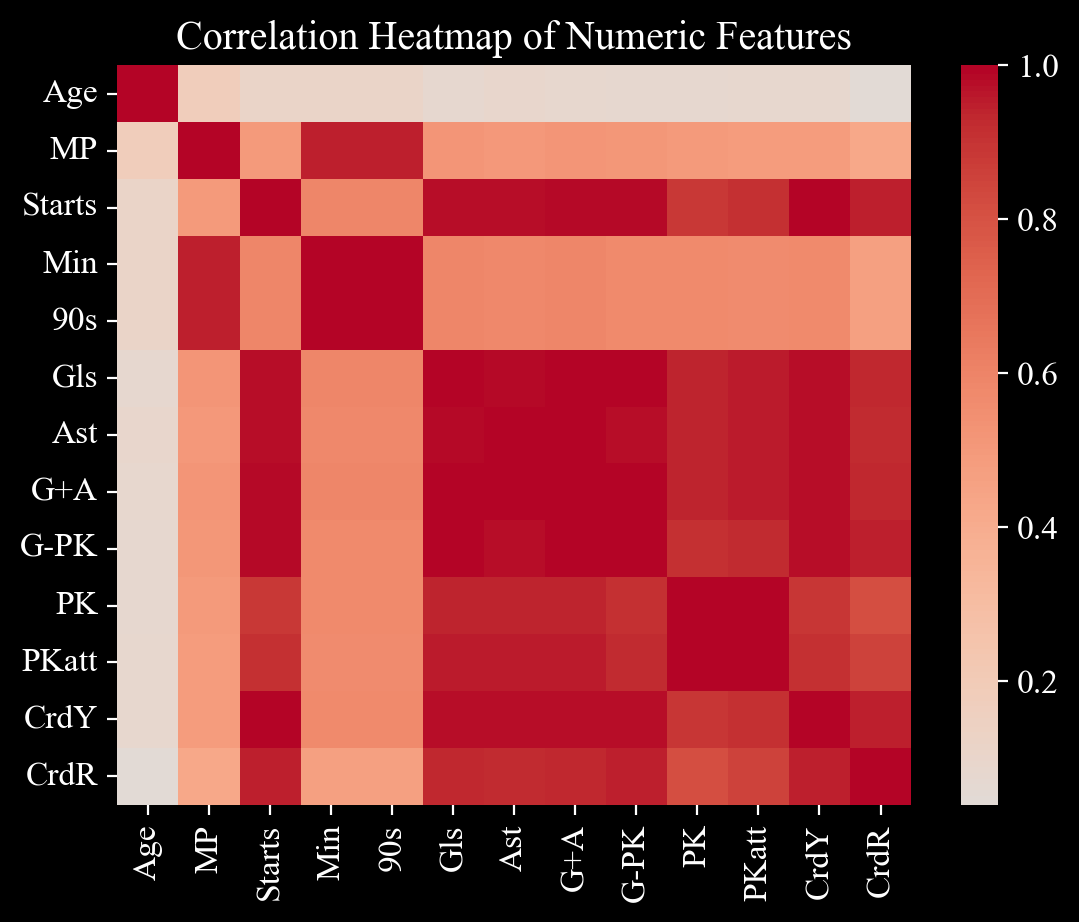

In [7]:
sns.heatmap(df_Stats_numeric.corr(), annot=False, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.grid(False)
plt.show()

In [8]:
pd.isna(df_Stats_numeric).sum()
#Eliminamos las filas que tienen NaN
df_Stats_numeric.dropna(inplace=True)
#Revisamos si hay NaN
pd.isna(df_Stats_numeric).sum()

Age       0
MP        0
Starts    0
Min       0
90s       0
Gls       0
Ast       0
G+A       0
G-PK      0
PK        0
PKatt     0
CrdY      0
CrdR      0
dtype: int64

In [9]:
df_Stats.describe()

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
count,42.000000,42.000000,42.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,24.695238,14.000000,26.714286,1074.729730,11.948649,3.432432,2.081081,5.513514,2.810811,0.621622,0.783784,7.108108,0.405405
std,4.733119,11.546301,79.237305,984.502036,10.937261,9.526398,5.722171,15.192508,7.748971,1.919944,2.358615,19.772011,1.165701
min,15.000000,0.000000,0.000000,5.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.250000,0.250000,275.000000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,10.000000,5.000000,669.000000,7.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,28.000000,25.750000,18.750000,1663.000000,18.500000,2.000000,1.000000,3.000000,2.000000,0.000000,0.000000,6.000000,0.000000
max,35.000000,34.000000,374.000000,3060.000000,34.000000,44.000000,27.000000,71.000000,36.000000,8.000000,10.000000,89.000000,5.000000


Text(0.5, 1.02, 'Pairplot of Numeric Features')

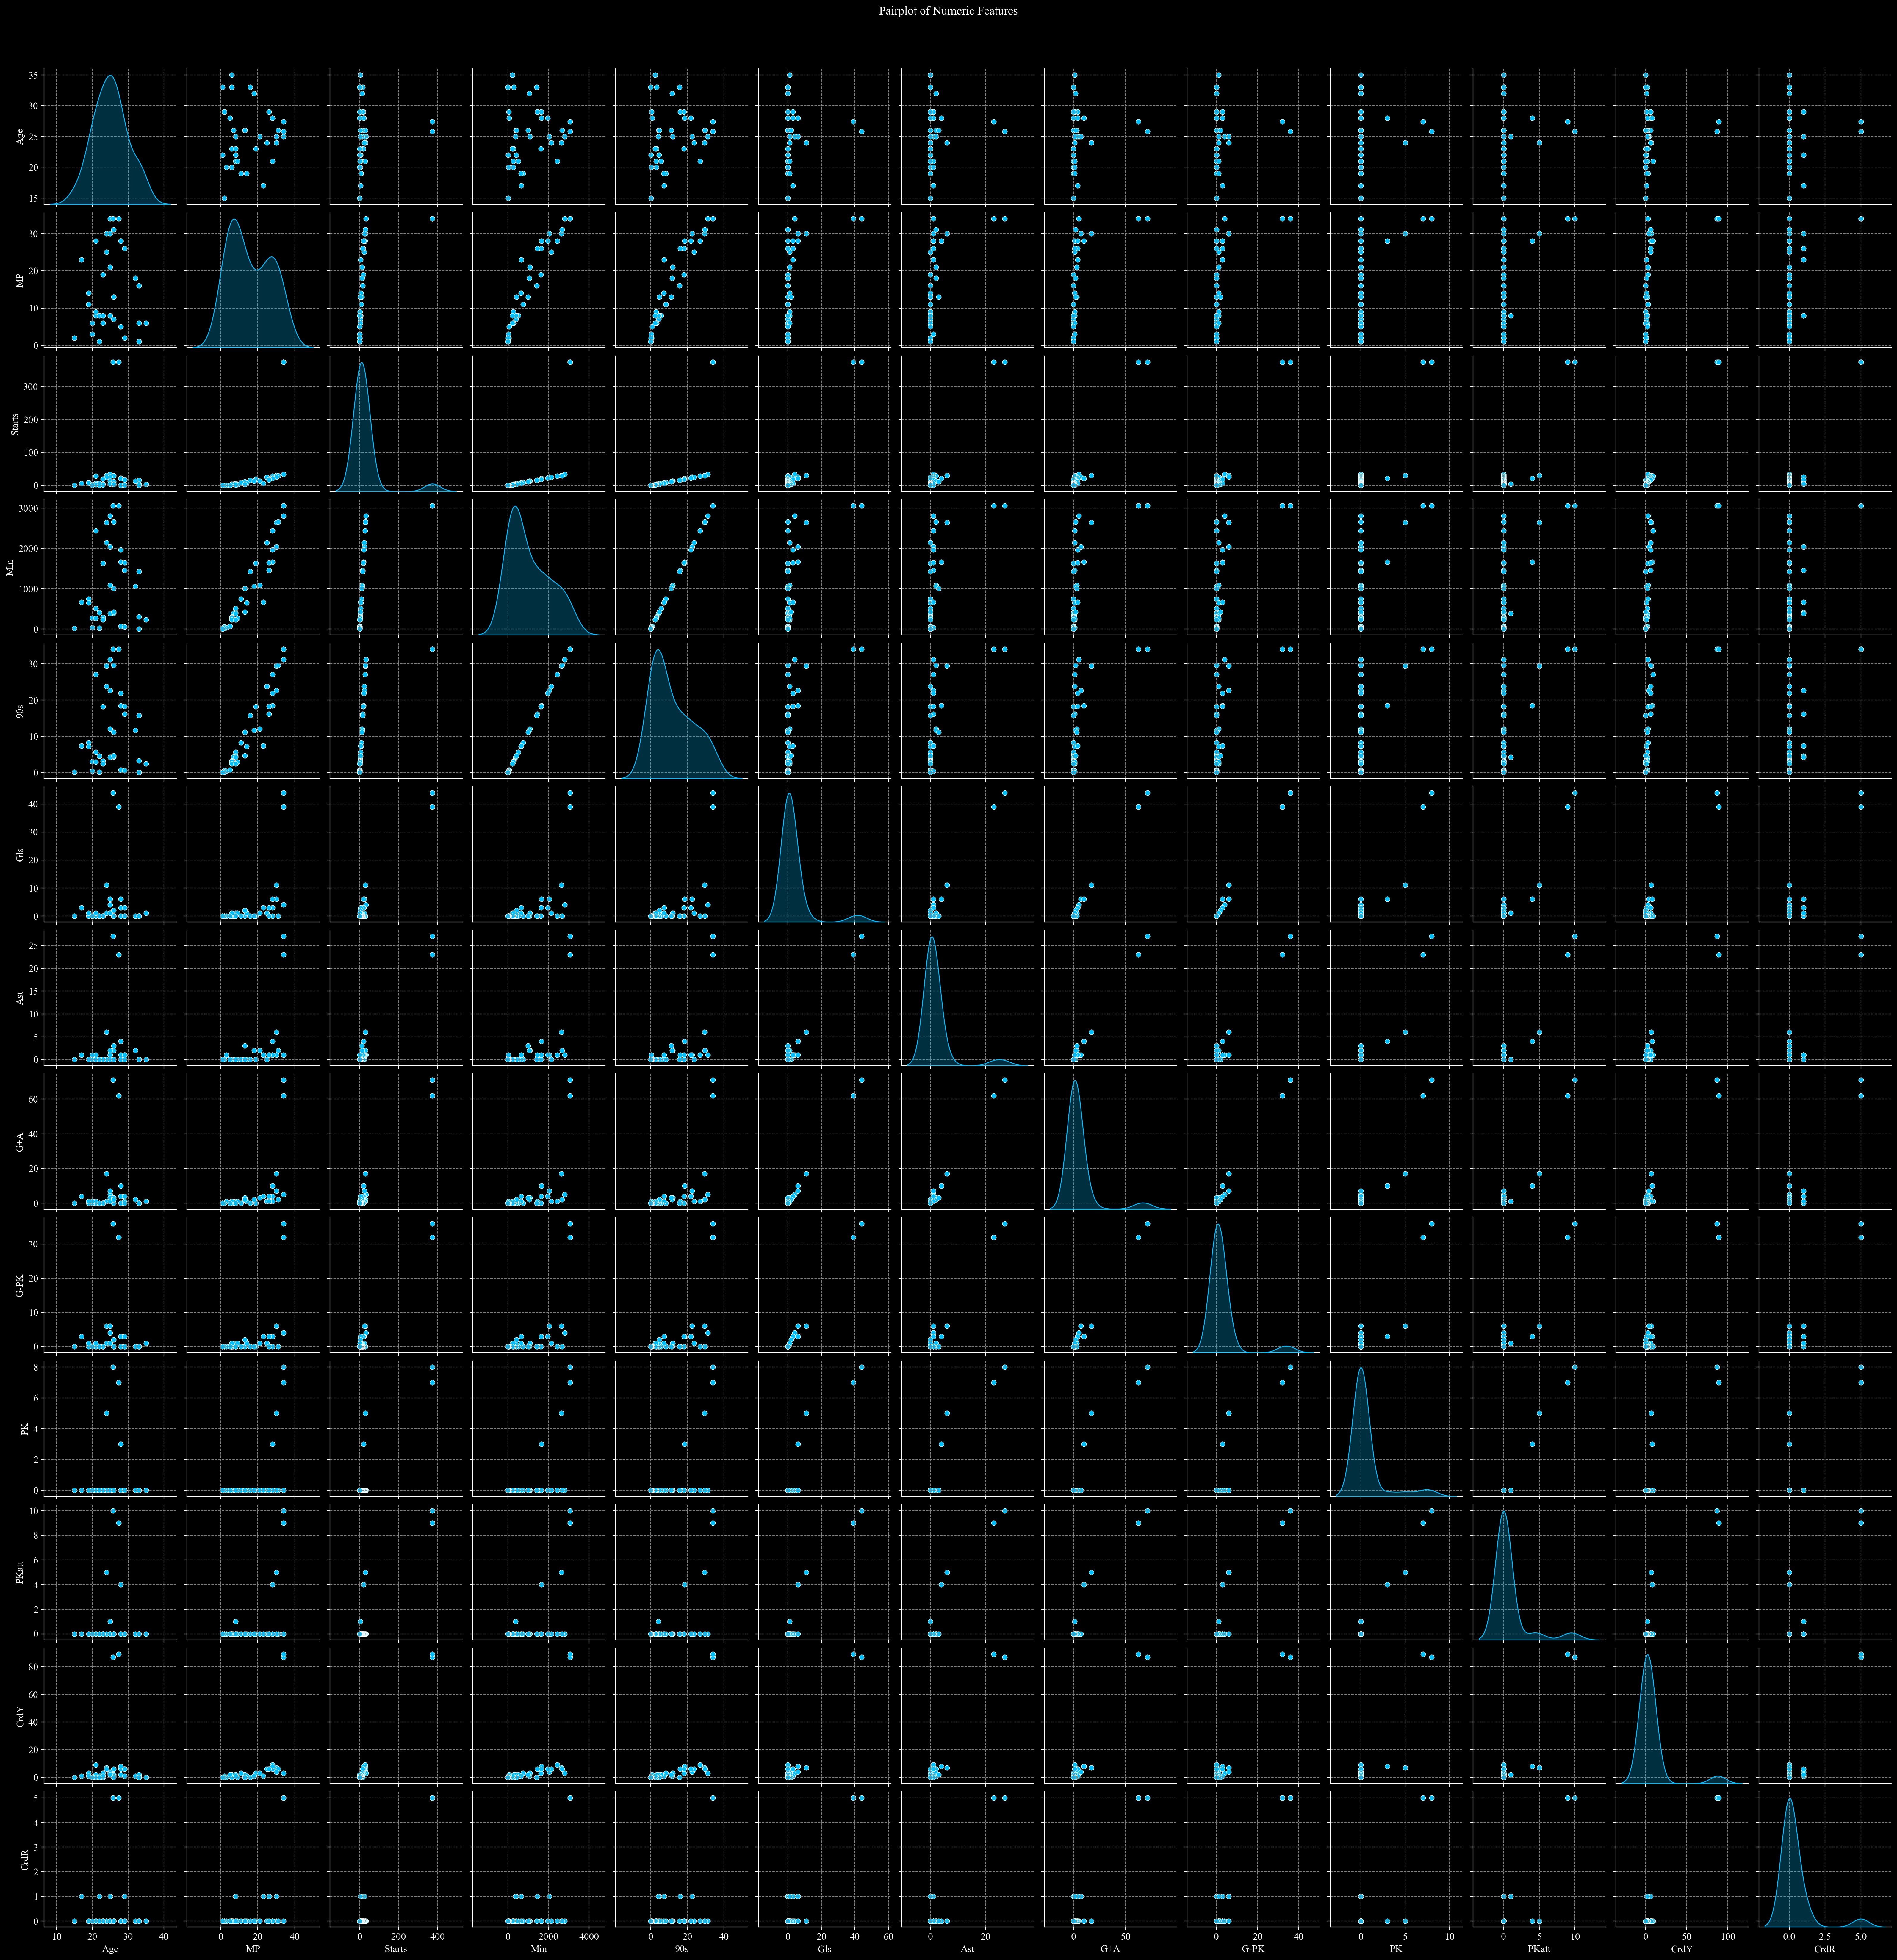

In [10]:
sns.pairplot(df_Stats_numeric, diag_kind='kde', markers='o', palette='coolwarm')
plt.suptitle('Pairplot of Numeric Features', y=1.02)

Text(0.5, 1.02, 'Histograms of Numeric Features')

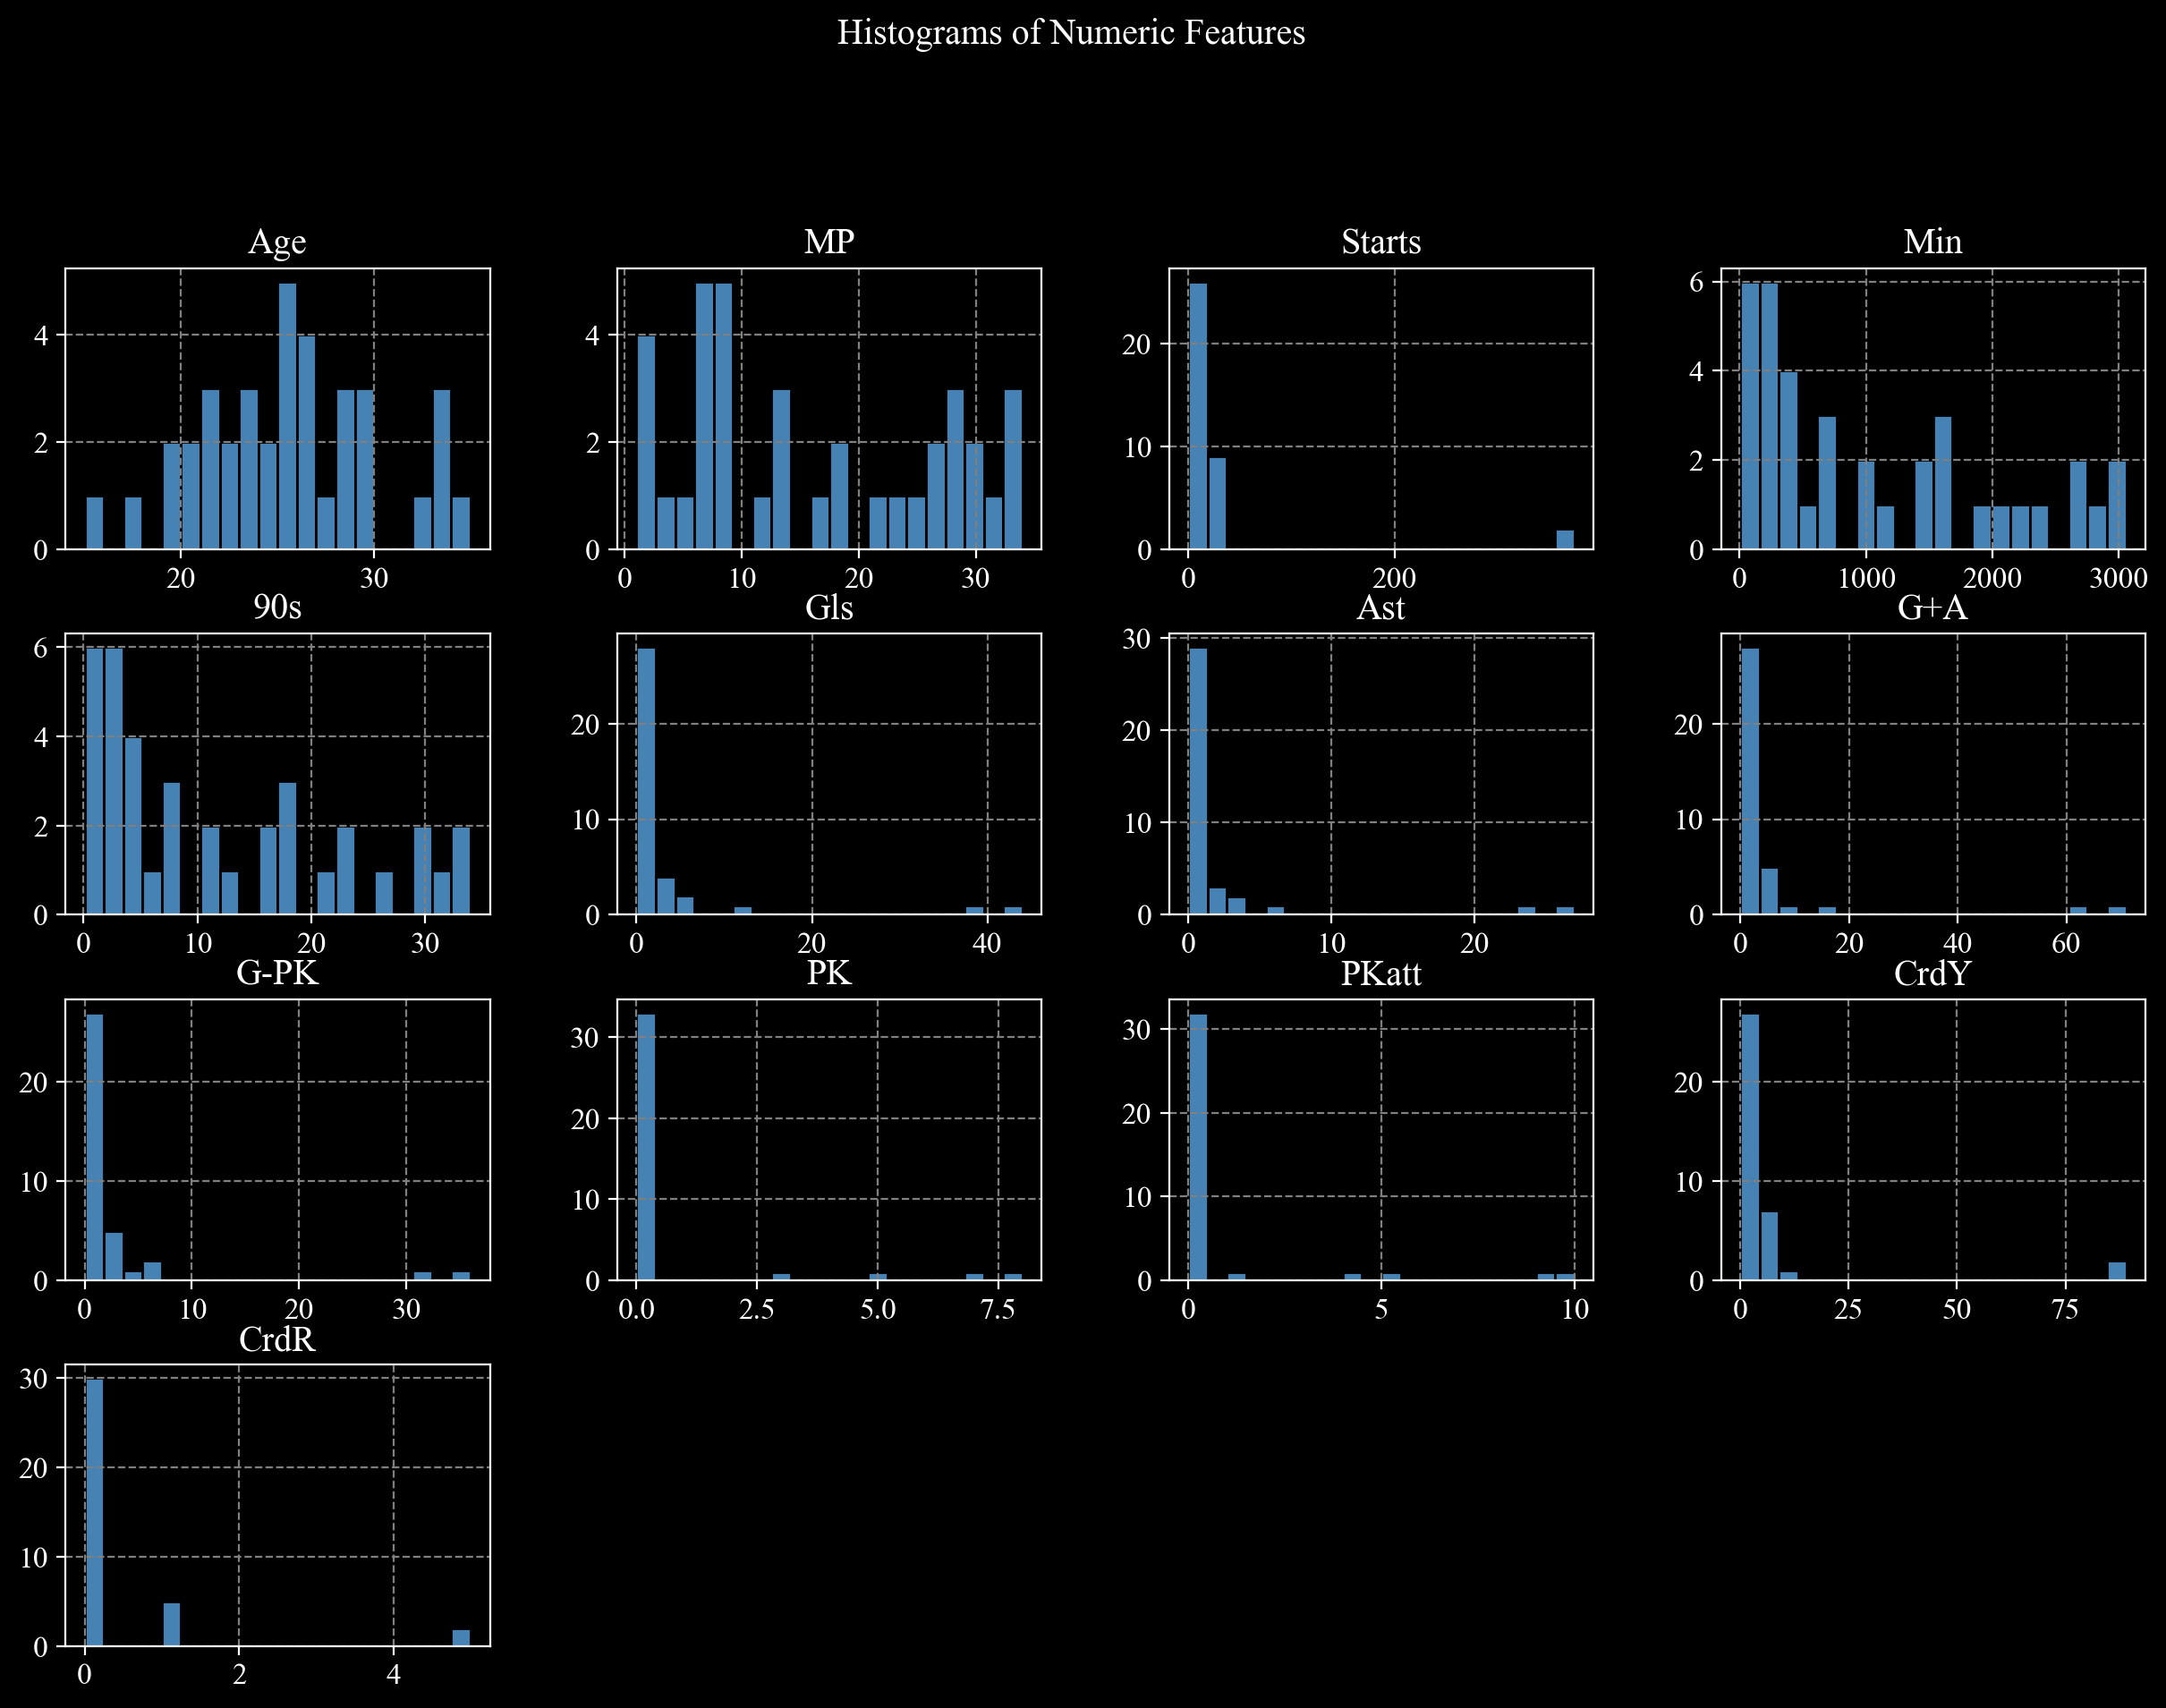

In [11]:
df_Stats_numeric.hist(figsize=(15, 10), bins=20, color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', y=1.02)

Text(0.5, 1.0, 'Boxplot of Numeric Features')

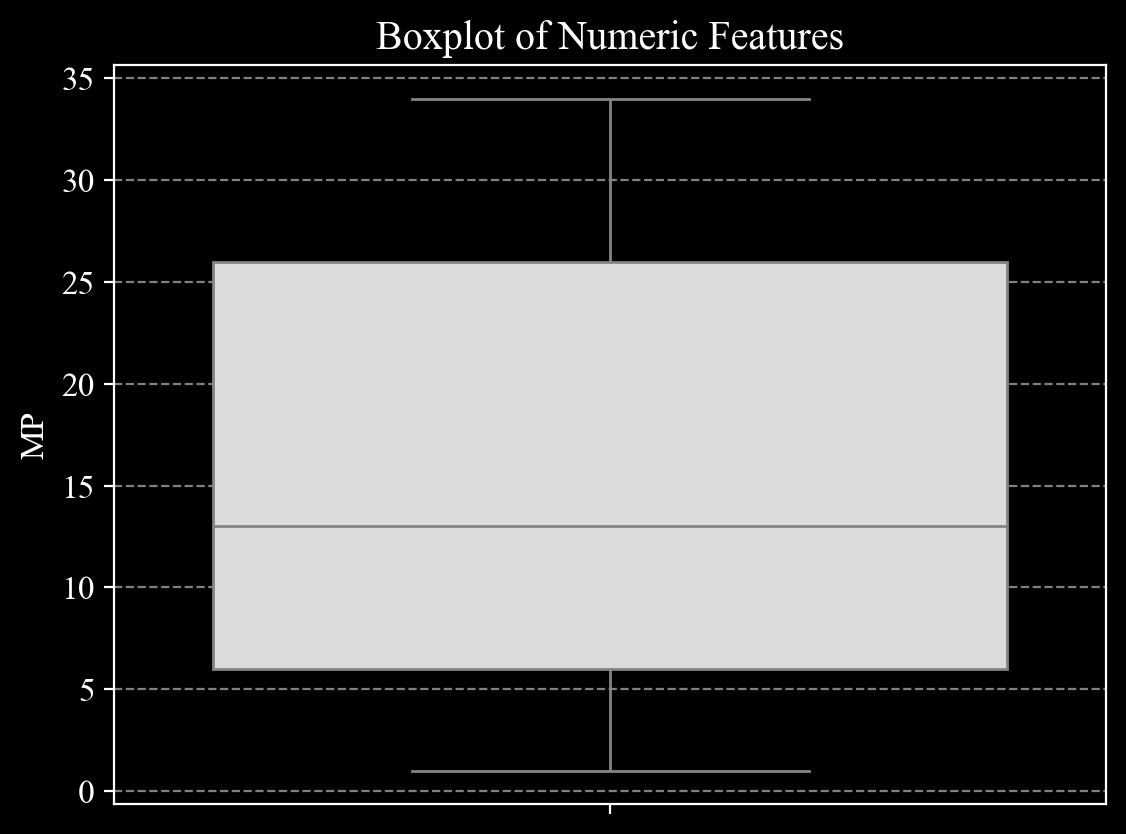

In [16]:
sns.boxplot(data=df_Stats_numeric['MP'], orient='v', palette='coolwarm')
plt.title('Boxplot of Numeric Features')

# Ajuste de modelo usando scikit-learn

In [47]:
X = df_Stats_numeric['MP']
y = df_Stats_numeric['Min']
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size = 0.8,
                                        random_state =123,
                                        shuffle = True
)

In [48]:
# Creación del modelo
modelo = LinearRegression()
modelo.fit(X=X_train.reshape(-1,1), y=y_train)

LinearRegression()

In [49]:
# información del modelo
print('Intercepto', modelo.intercept_)
print("Coeficiente:", list(zip(['MP'], modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X.values.reshape(-1,1), y))

Intercepto [-298.15844756]
Coeficiente: [('MP', np.float64(85.37762361157544))]
Coeficiente de determinación R^2: 0.9024311012643054


In [50]:
#Desempeño de predicción
predicciones = modelo.predict(X=X_test)
print('Las predicciones son:\n',  predicciones)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        #squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

Las predicciones son:
 [[2092.41501356]
 [1324.01640106]
 [1238.63877744]
 [1067.88353022]
 [1836.28214272]
 [-212.78082395]
 [ 811.75065939]
 [ -42.02557673]]

El error (rmse) de test es: 72230.27419278651


# Ajuste usando statsmodels

In [54]:
X = df_Stats_numeric[['MP']]
y = df_Stats_numeric[['Min']]
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size = 0.8,
                                        random_state =123,
                                        shuffle = True
)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29, 1)
(8, 1)
(29, 1)
(8, 1)


In [56]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
data_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['MP', 'Min'])
modelo = smf.ols(formula = 'Min ~ MP', data = data_train)
modelo = modelo.fit()

print(modelo.summary())

#help(np.hstack)
#hstack(tup)
#    Stack arrays in sequence horizontally (column wise).

#    This is equivalent to concatenation along the second axis, except for 1-D
#    arrays where it concatenates along the first axis. Rebuilds arrays divided
#    by `hsplit`.

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     258.5
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           2.37e-15
Time:                        21:33:07   Log-Likelihood:                -207.71
No. Observations:                  29   AIC:                             419.4
Df Residuals:                      27   BIC:                             422.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -298.1584    104.207     -2.861      0.0

## Interpretación del summary


1.   R-squared (R²):Cuantifica la variabilidad en la variable dependiente (y) explicada por el modelo.
2.   Adjusted R-squared (R² ajustada): Similar a R², pero ajusta el valor por el número de predictores en el modelo. Es útil cuando se consideran múltiples variables predictoras.
3.   F-statistic (Estadístico F): Es una prueba de hipótesis que evalúa si, al menos, una variable independiente tiene un efecto significativo sobre la variable dependiente.
4.   Prob (F-statistic): Es el p-valor asociado al F-statistic
5.   Log-Likelihood (Log-Likelihood):Es el logaritmo de la función de verosimilitud, que mide la probabilidad de observar los datos dados los parámetros del modelo. Un valor más alto es mejor.
6.   AIC (Criterio de Información de Akaike): Es un criterio de selección de modelos que penaliza modelos más complejos. Un valor más bajo indica un mejor ajuste. [AIC](https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike)
7.   BIC (Criterio de Información Bayesiano): Similar al AIC, pero con una penalización más fuerte para modelos con más parámetros.
8.   Omnibus, Prob(Omnibus), Jarque-Bera (JB), Skew, Kurtosis: Estadísticas que evalúan supuestos sobre los residuos del modelo. Prob(Omnibus) y Prob(JB) son pruebas de normalidad. Un valor bajo en estas pruebas podría indicar desviaciones de la normalidad. Skew mide la asimetría de los residuos, y Kurtosis mide la forma de las colas de la distribución de residuos.

* Hipótesis Nula (H0): La distribución de los residuos sigue una distribución normal.

* Hipótesis Alternativa (H1): La distribución de los residuos no sigue una distribución normal.
9.   Durbin-Watson: Es una estadística que detecta la presencia de autocorrelación en los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación.

Extracción del Modelo

In [62]:
#Parametros
parametros = modelo.params
parametros

Intercept   -298.158448
MP            85.377624
dtype: float64

In [63]:
print(f"Los coeficientes son\\:{modelo.params}")
print(f"Beta_0:{modelo.params[0]}")
print(f"Beta_0:{modelo.params[1]}")
print(f"R cuadrada adjustada:{modelo.rsquared_adj}")
print(f"R cuadrada:{modelo.rsquared}")

Los coeficientes son\:Intercept   -298.158448
MP            85.377624
dtype: float64
Beta_0:-298.1584475649173
Beta_0:85.3776236115755
R cuadrada adjustada:0.9019359492765664
R cuadrada:0.9054382368024033


In [64]:
#Intervalos de confianza para los parámetros
modelo.conf_int(0.05)

,0,1
Intercept,-511.974436,-84.342459
MP,74.482503,96.272744


In [57]:
data_train.head()

,MP,Min
0,21.0,1087.0
1,8.0,513.0
2,34.0,3060.0
3,28.0,2436.0
4,28.0,1663.0


In [58]:
modelo.predict()

array([1494.77164828,  384.86254133, 2604.68075523, 2092.41501356,
       2092.41501356, -127.40320034,  128.72967049,  897.128283  ,
        299.48491772, 2263.17026078,  384.86254133,  214.1072941 ,
       2604.68075523,  811.75065939,  214.1072941 , 1921.65976634,
        640.99541216, -127.40320034, 2604.68075523, 2263.17026078,
        214.1072941 ,  214.1072941 ,  470.24016494, 1921.65976634,
        384.86254133, 1665.5268955 , -212.78082395,  384.86254133,
       2348.54788439])

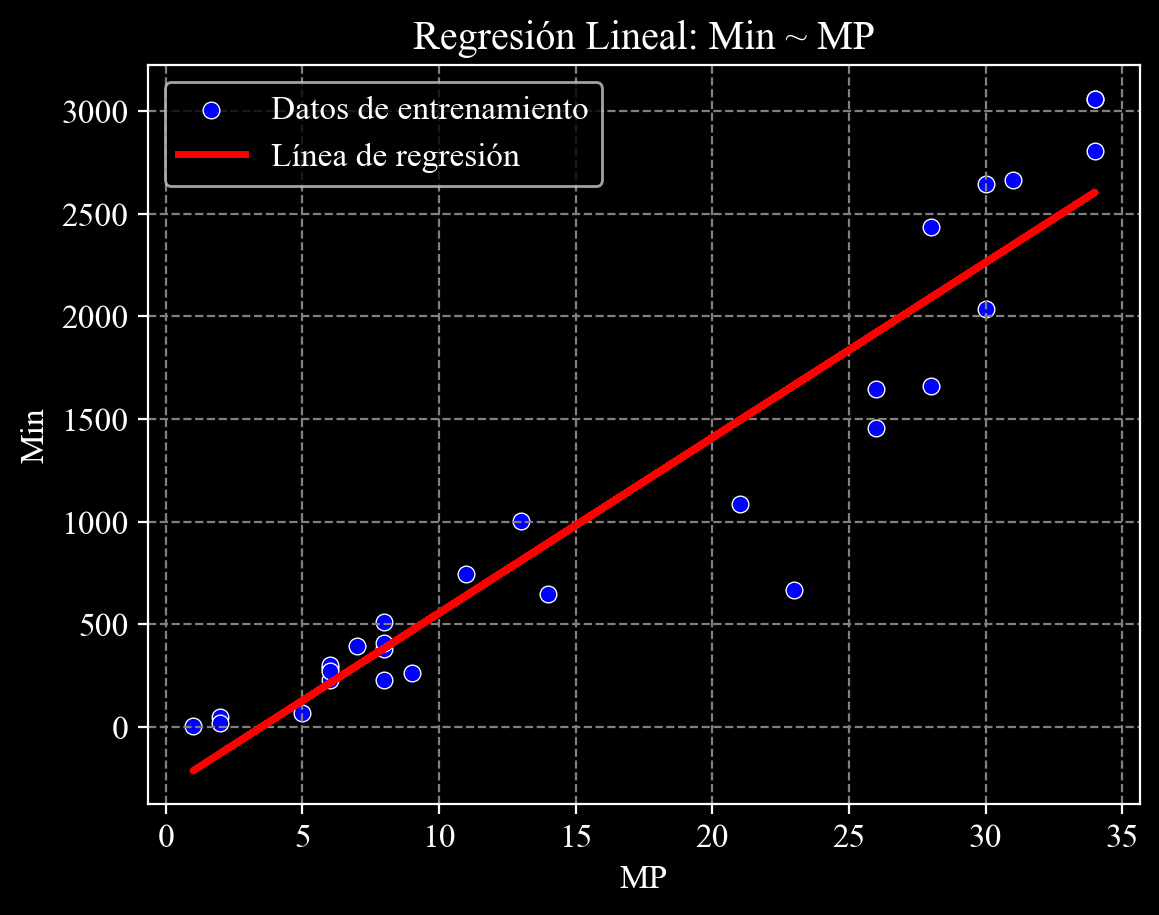

In [59]:
# Gráfico de dispersión de los datos de entrenamiento
sns.scatterplot(x='MP', y='Min', data=data_train, color ='blue', label='Datos de entrenamiento')

# Línea de regresión ajustada
plt.plot(data_train['MP'], modelo.predict(data_train['MP']), color='red', label='Línea de regresión')

# Etiquetas y leyenda
plt.xlabel('MP')
plt.ylabel('Min')
plt.title('Regresión Lineal: Min ~ MP')
plt.legend()

# Mostrar el gráfico
plt.show()

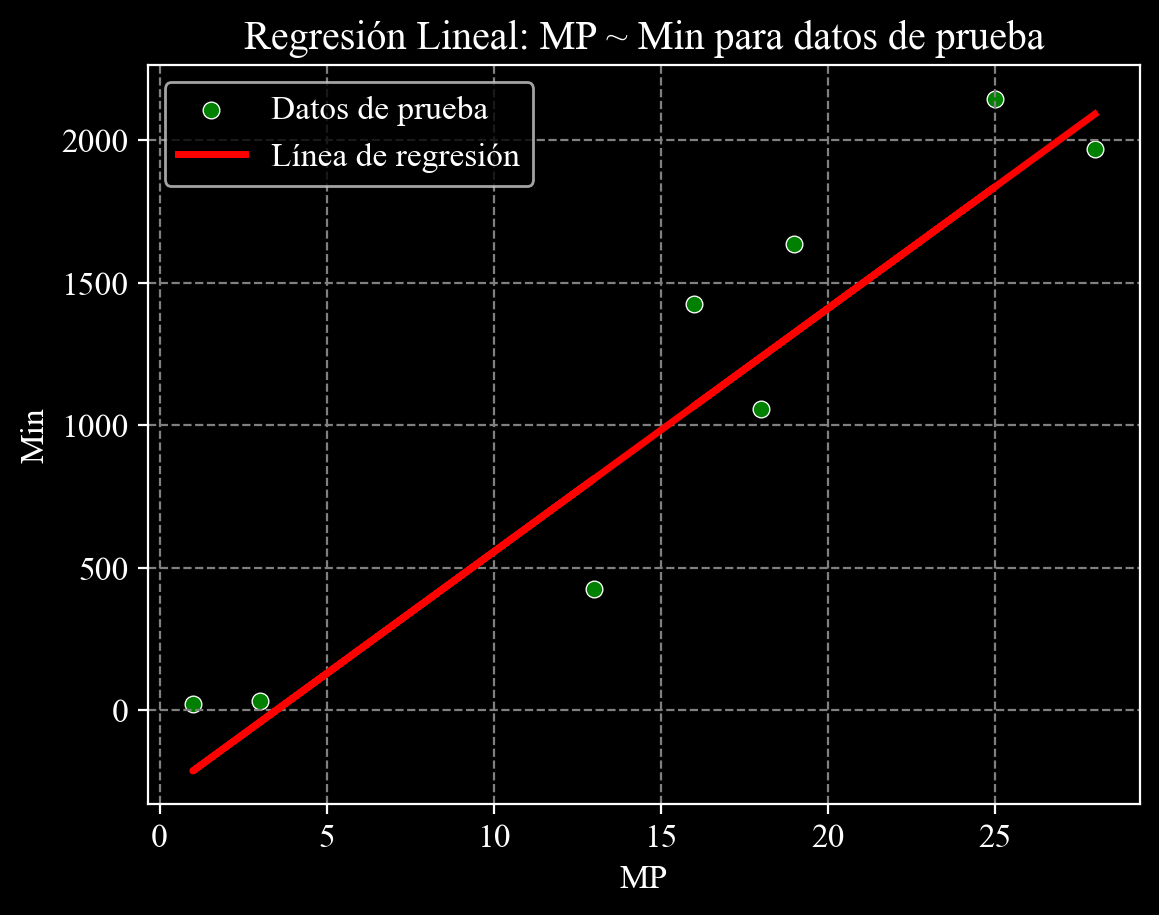

In [61]:
data_test = pd.DataFrame(np.hstack((X_test, y_test)), columns=['MP', 'Min'])
# Gráfico de dispersión de los datos de prueba
sns.scatterplot(x='MP', y='Min', data=data_test, color ='green', label='Datos de prueba')

# Línea de regresión ajustada
plt.plot(data_test['MP'], modelo.predict(data_test['MP']), color='red', label='Línea de regresión')

# Etiquetas y leyenda
plt.xlabel('MP')
plt.ylabel('Min')
plt.title('Regresión Lineal: MP ~ Min para datos de prueba')
plt.legend()

# Mostrar el gráfico
plt.show()

In [65]:
modelo_test = smf.ols(formula = 'Min ~ MP', data = data_test)
modelo_test = modelo_test.fit()
print(modelo_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     50.40
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           0.000392
Time:                        22:23:06   Log-Likelihood:                -55.770
No. Observations:                   8   AIC:                             115.5
Df Residuals:                       6   BIC:                             115.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -197.8013    209.583     -0.944      0.3

# Supuestos del Modelo

In [66]:
resid_val = modelo.resid
fitted_val= modelo.predict()
print(f"Media de los residuales: {modelo.resid.mean()}")
print(f"Desviación estándar de los residuales: {modelo.resid.std()}")

Media de los residuales: -2.0777249652571207e-13
Desviación estándar de los residuales: 317.72681562531227


## Prueba de Normalidad

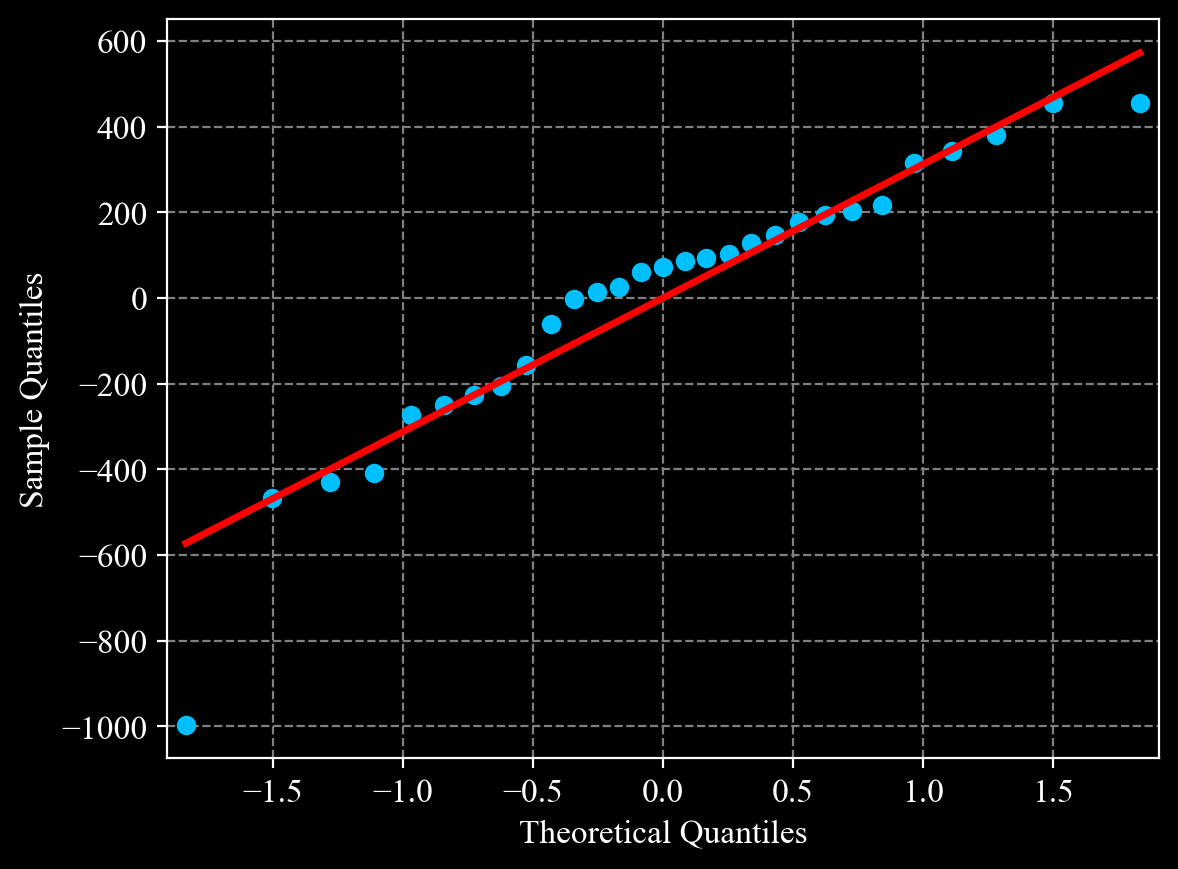

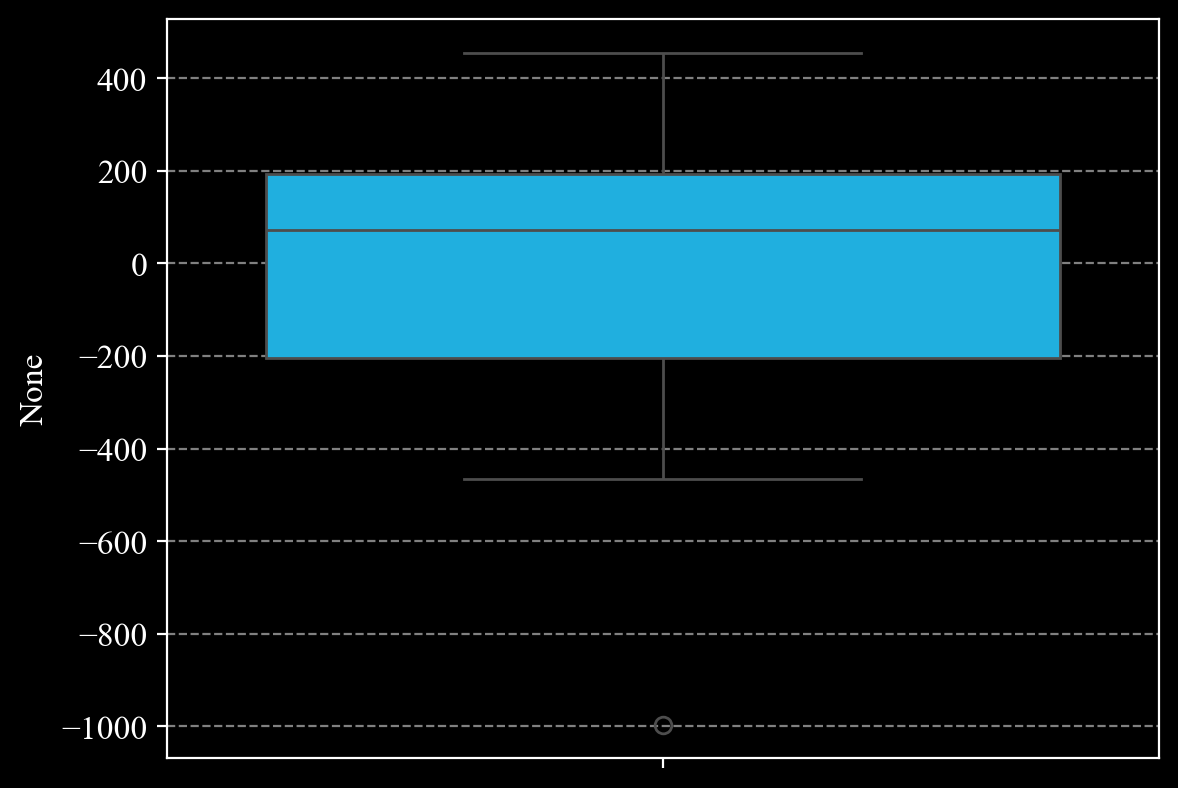

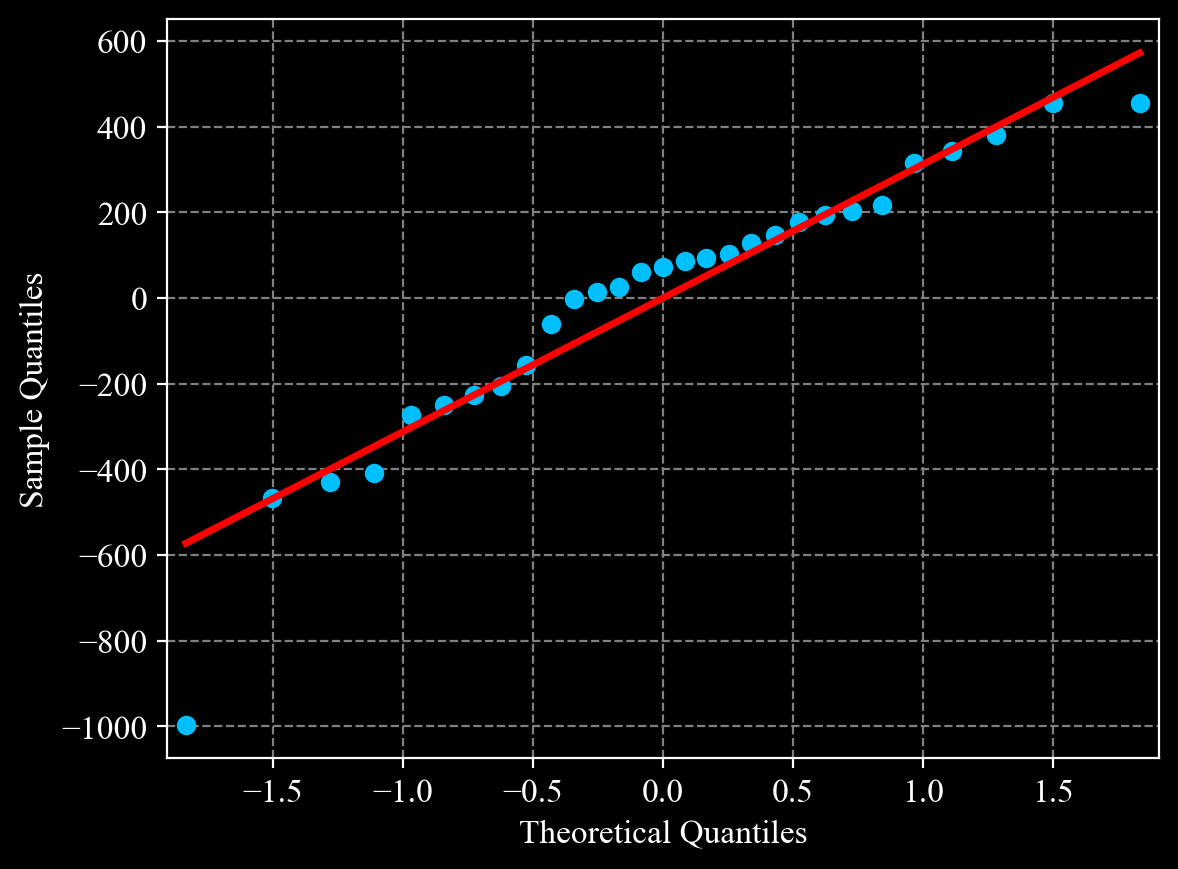

In [67]:
sns.boxplot(y=resid_val)
sm.qqplot(resid_val,line='s')

ShapiroResult(statistic=np.float64(0.9251345565716463), pvalue=np.float64(0.04121630879006733))

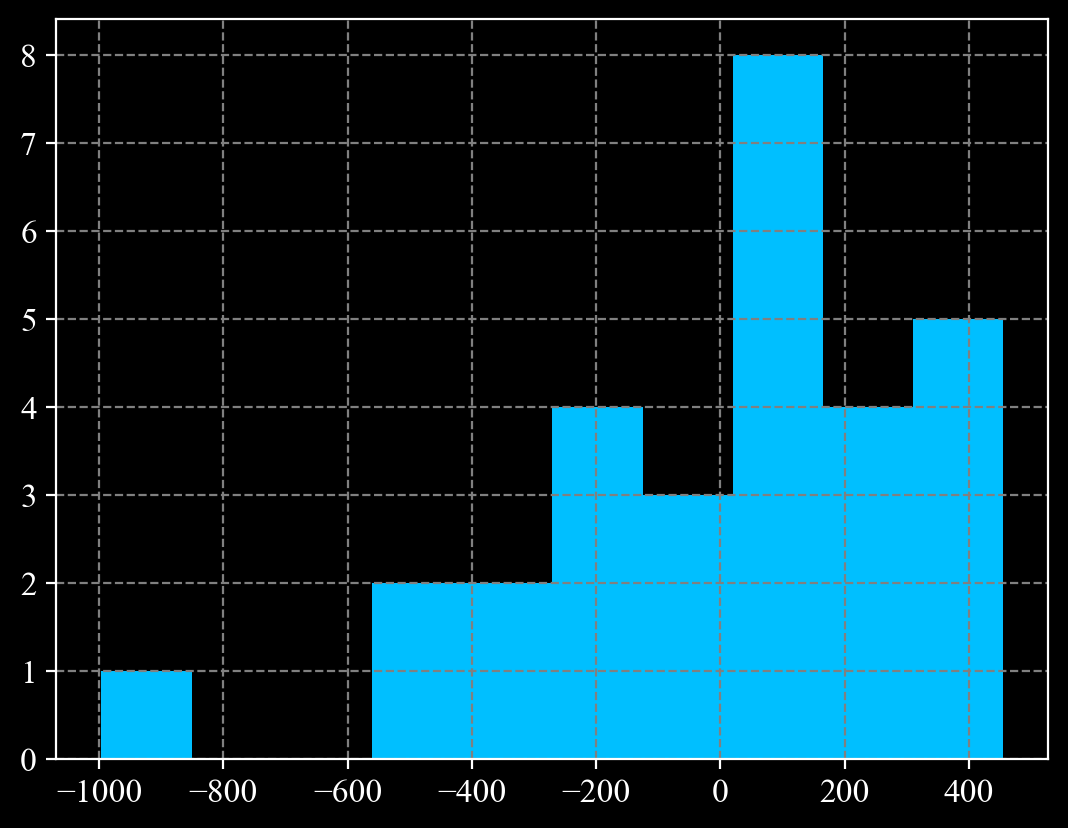

In [68]:
plt.hist(resid_val)

stats.shapiro(modelo.resid) #from scipy import stats

$$H_0: \text{los residuales son normales} \quad vs. \quad  H_a:\text{los residuales NO-son normales} $$

Text(0.5, 1.0, 'Fitted vs Observed')

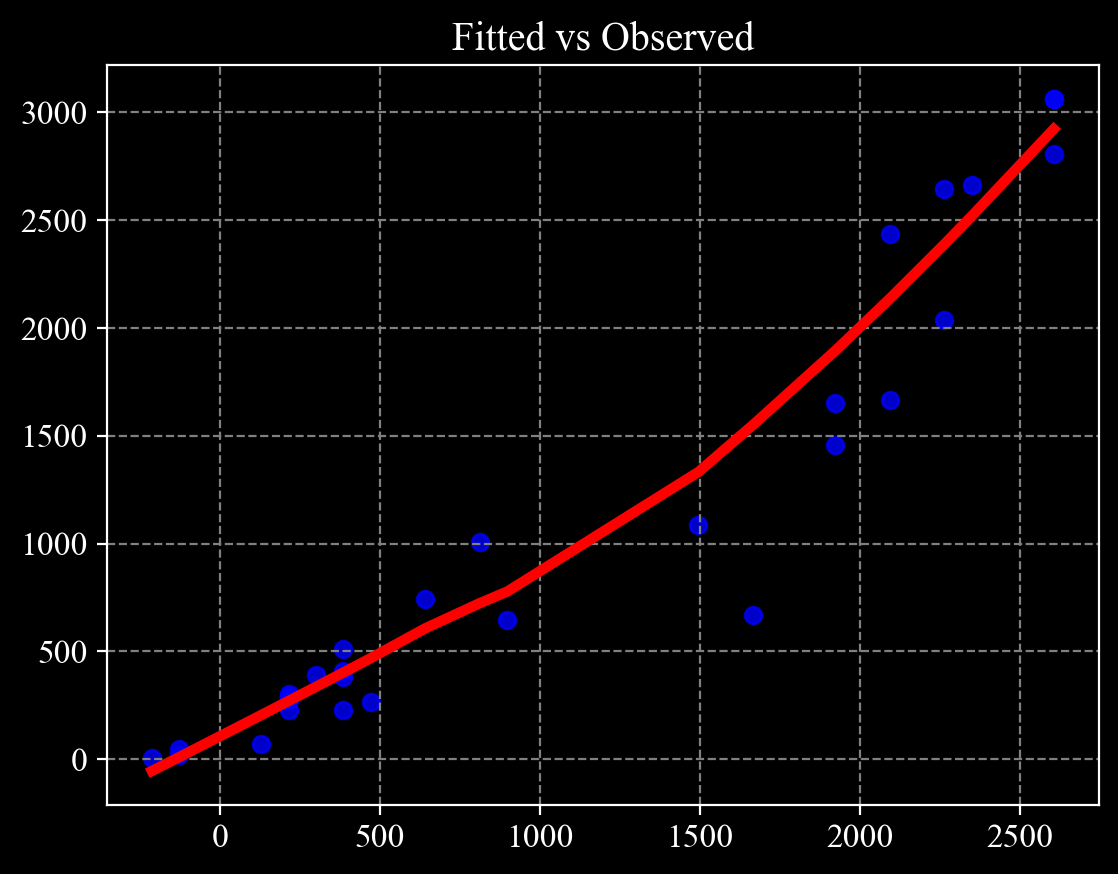

In [69]:
# Linearity in Model

sns.regplot(x=fitted_val,y = y_train, color='blue', lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Observed')

Text(0.5, 1.0, 'Fitted vs Residuals')

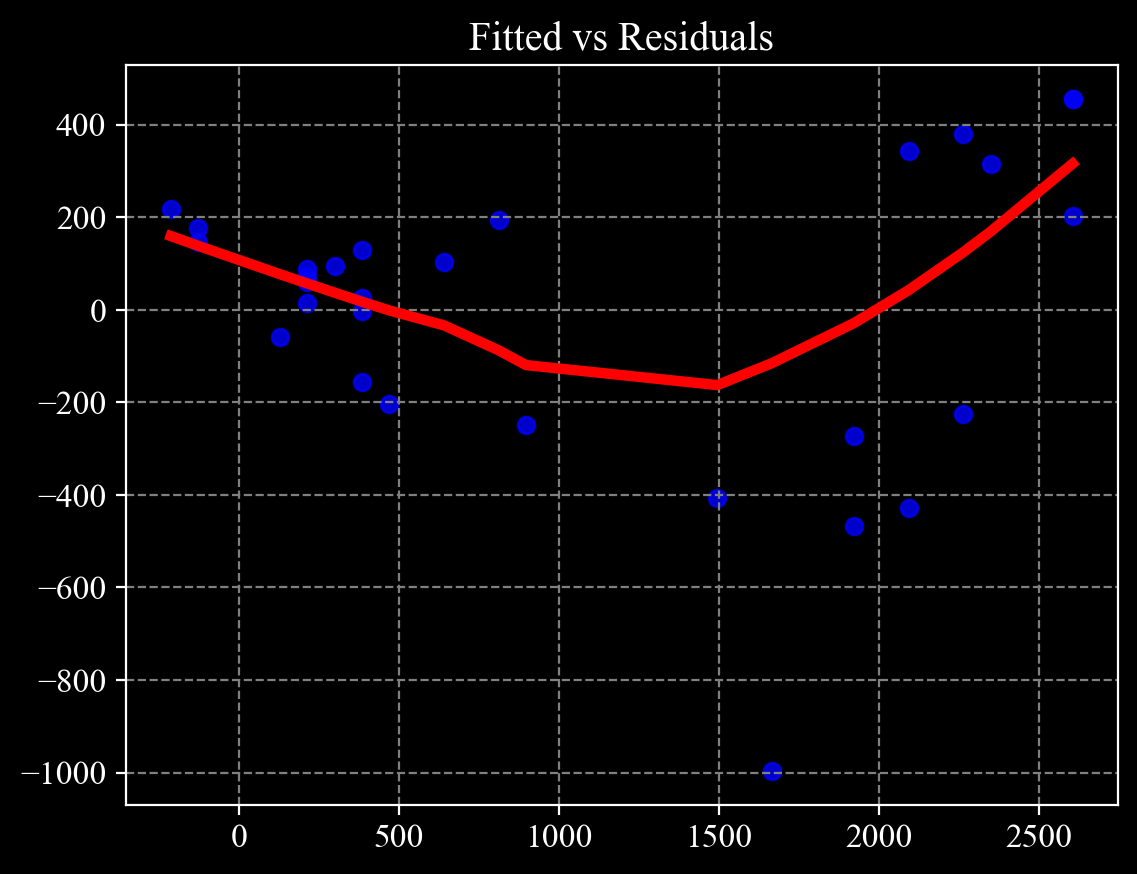

In [70]:
# Homocedasticidad: Igualdad de varianzas
sns.regplot(x=fitted_val,y = resid_val, color='blue', lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Residuals')

Text(0.5, 1.0, 'Fitted vs Residuals stand')

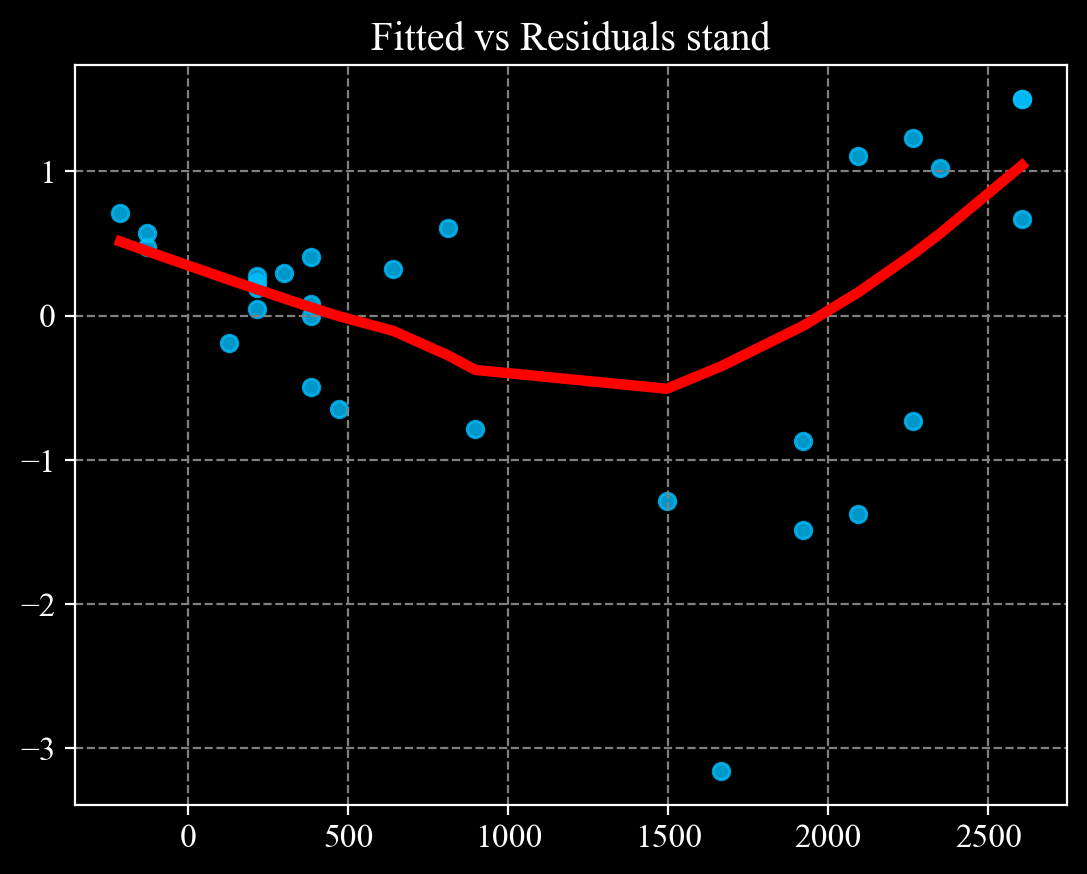

In [71]:
# Es mejor usar los residuales estandarizados
resid_stand= modelo.get_influence().resid_studentized_internal
sns.regplot(x=fitted_val,y = resid_stand, lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Residuals stand')

La prueba más comúnmente utilizada para verificar la homocedasticidad (homogeneidad de varianzas) en los residuales de un modelo de regresión es la prueba de Breusch-Pagan. Esta prueba evalúa si la varianza de los residuales es constante en todos los niveles de las variables independientes. La hipótesis nula y alternativa para la prueba de Breusch-Pagan son las siguientes:

Hipótesis Nula (H0): La varianza de los residuales es constante (homocedasticidad).

Hipótesis Alternativa (H1): La varianza de los residuales no es constante (heterocedasticidad).

La estadística de la prueba sigue una distribución chi-cuadrado, y se compara el valor p asociado con esta estadística con un umbral de significancia (comúnmente 0.05).

valores limite de apalancamiento: 0.10810810810810811


0.10810810810810811

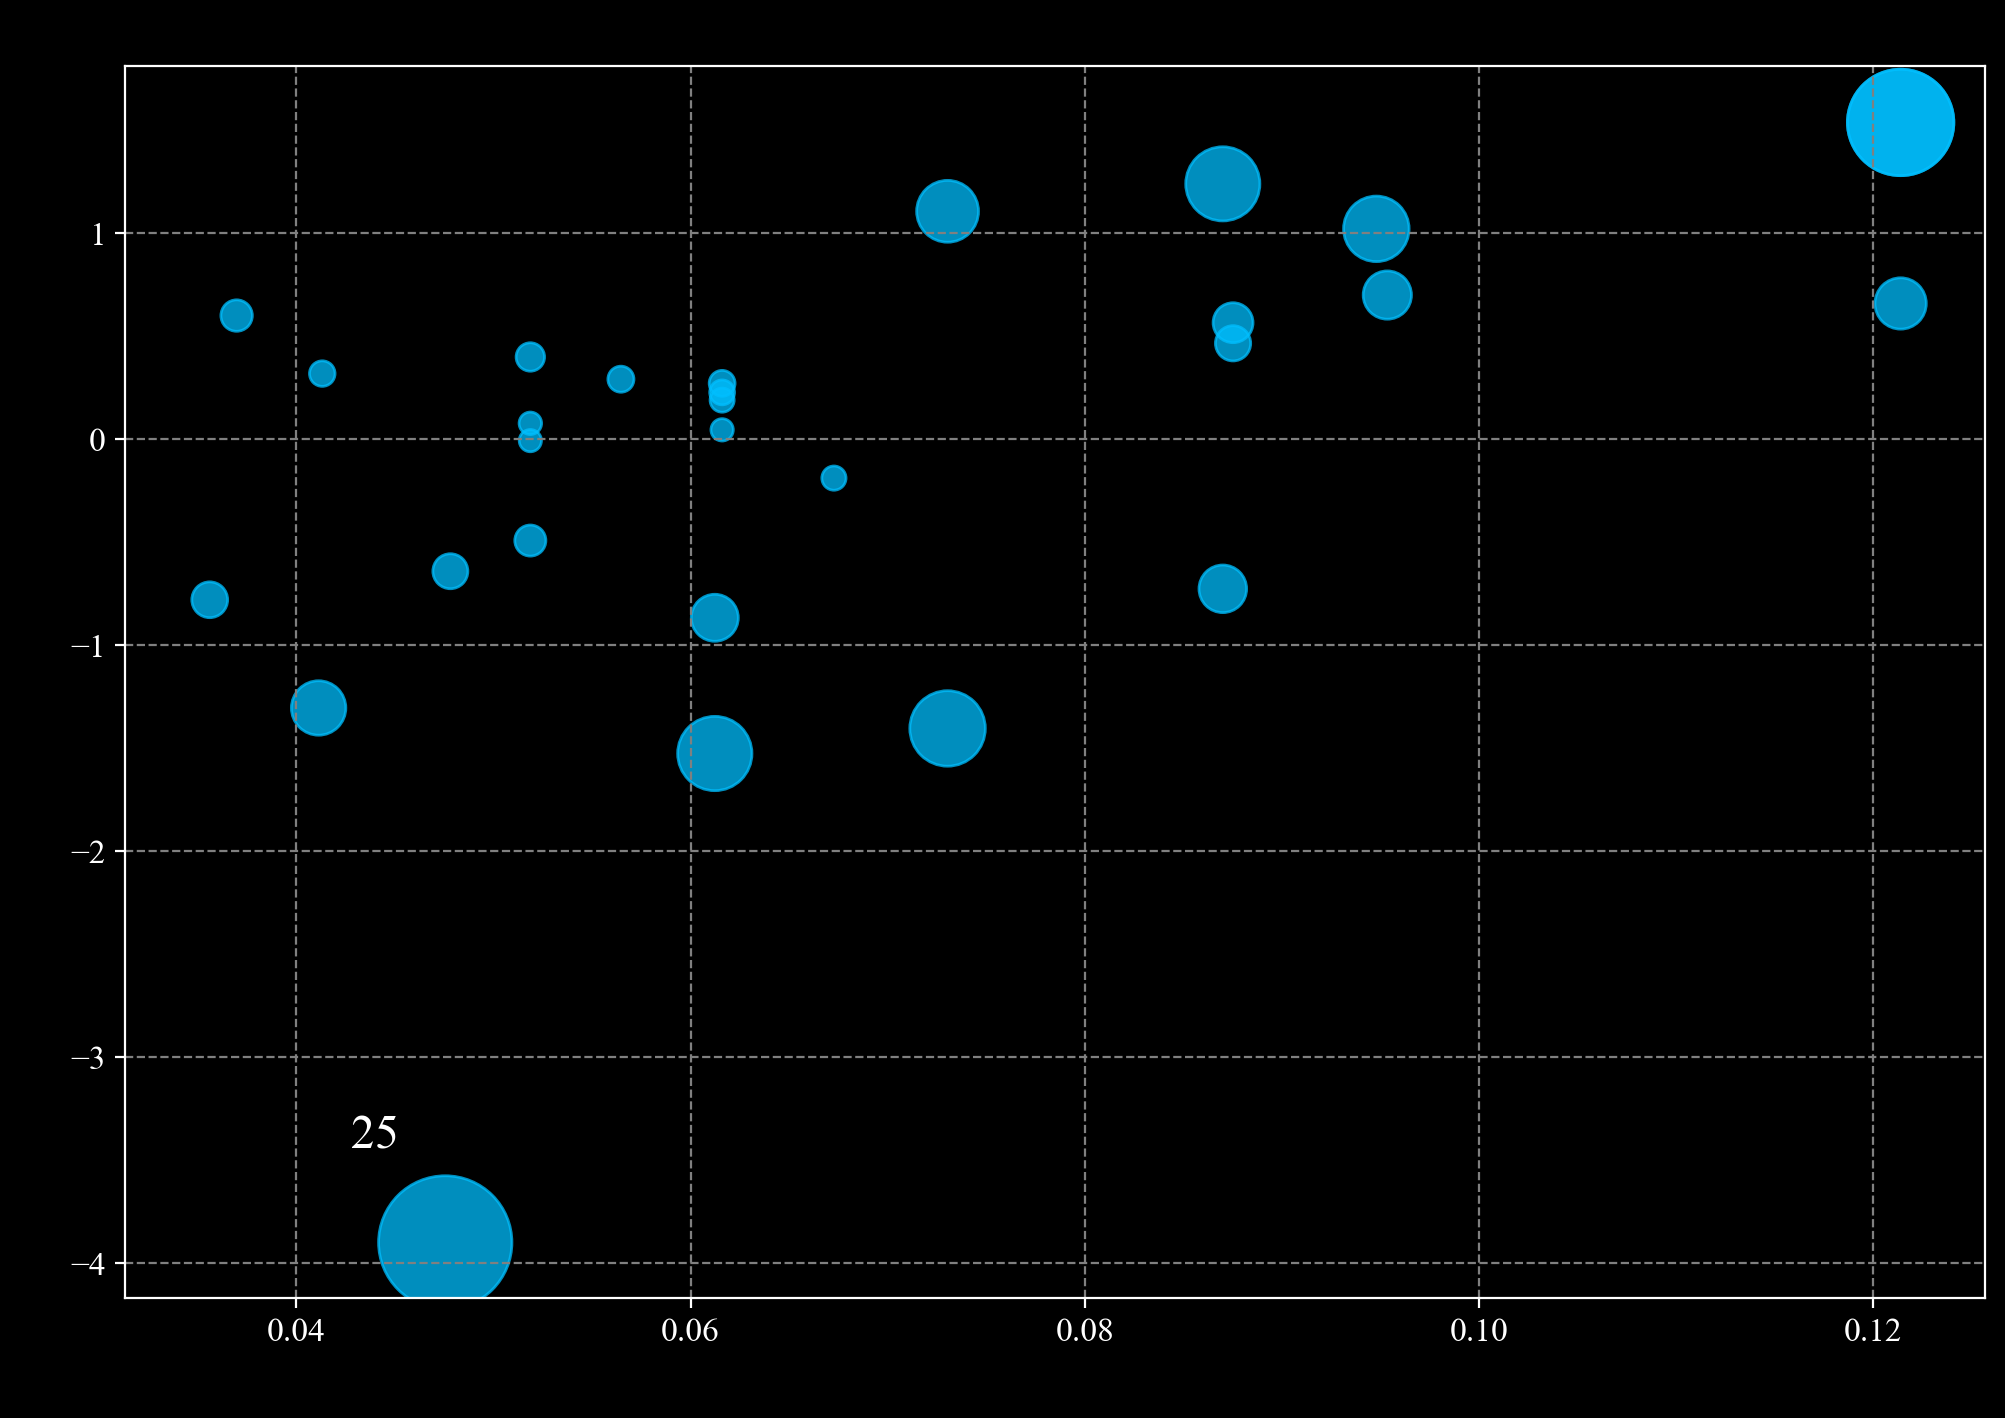

In [72]:
# Leverage points: Apalancamiento

# Influence points: cook distance (Gráfico de influencia)
fig, ax= plt.subplots(figsize=(12,8))
sm.graphics.influence_plot(modelo, alpha= 0.05, ax=ax,criterion="cooks")

# Para determinar los valores límites del apalancamiento, se utiliza la fórmula 2*p/n, donde
#p: el número de coeficientes
#n: el número de observaciones
print("valores limite de apalancamiento:", (2*(X.shape[1]+1))/X.shape[0])

2*((X.shape[1]+1)/X.shape[0])

# Modelo Usando Matrices (Más recomendado)

Se apega más a la teoría

In [73]:
X = df_Stats_numeric[['MP']]
y = df_Stats_numeric[['Min']]
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size = 0.8,
                                        random_state =123,
                                        shuffle = True
)

In [ ]:
# Ajuste del Modelo utilizando matrices como en scikitlearn
X_train = sm.add_constant(X_train, prepend=True) # Agregar la constante (intercepto)
modelo = sm.OLS(y_train,X_train)
modelo = modelo.fit()
print(modelo.summary())
#Notar que el resultado es el mismo que el anterior, pero la forma de ajustar el modelo es diferente.
#En este caso, el modelo se ajusta utilizando matrices, como en scikitlearn.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     258.5
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           2.37e-15
Time:                        22:40:31   Log-Likelihood:                -207.71
No. Observations:                  29   AIC:                             419.4
Df Residuals:                      27   BIC:                             422.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.1584    104.207     -2.861      0.0

In [75]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-511.97443592,  -84.34245921],
       [  74.4825033 ,   96.27274393]])

In [76]:
predicciones = modelo.get_prediction(X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1494.771648,65.613825,1360.143201,1629.400096,817.374154,2172.169143
1,384.862541,73.689080,233.665038,536.060045,-296.021613,1065.746696
2,2604.680755,112.740298,2373.356772,2836.004739,1901.649225,3307.712285
3,2092.415014,87.446194,1912.990245,2271.839782,1404.711739,2780.118289


In [77]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

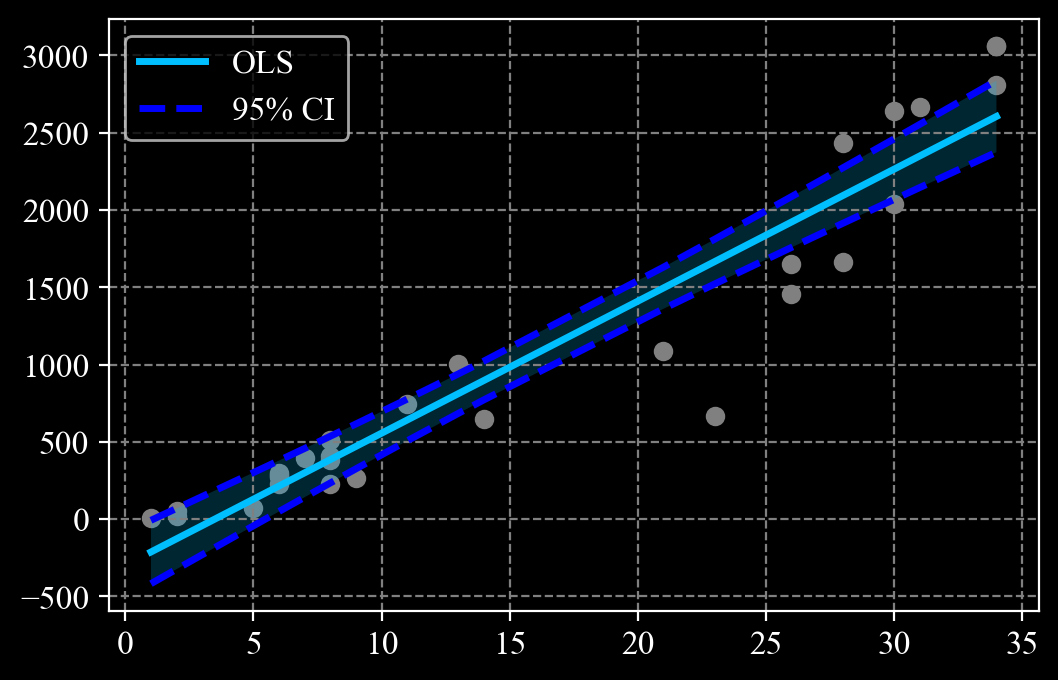

In [ ]:
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='blue', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='blue')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.2)
ax.legend();
#OLS: Ordinary Least Squares
# CI: Confidence Interval